dont need to normalise the varibales 

## Model Creation: 

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

# Statistics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

# Sklearn - model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Sklearn - linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('Life_Expectancy_clean.csv')
data.head()

,Life_Expectancy,State_FIPS_Code,County_FIPS_Code,Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,...,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation___non_white/white_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,County_Ranked_(Yes1/No0),Drinking_water_violations_raw_value
0,72.438750,-1.694237,-0.703354,2.334237,0.585167,0.972298,0.744619,1.185344,1.262168,0.600135,...,-0.542966,-0.303066,-0.110904,0.526556,-0.593029,0.093544,0.719976,-0.353999,0.149924,-0.857549
1,70.426037,-1.694237,-0.686844,2.505048,2.389854,2.887774,1.915747,1.184023,2.510570,0.882490,...,-0.802039,0.220084,-1.719216,1.152966,1.602039,0.173994,-0.089176,-0.334493,0.149924,1.166115
2,75.056297,-1.694237,-0.670334,0.548239,0.430316,0.944534,0.598795,0.020882,1.220460,-0.082221,...,-0.248064,-0.477779,-0.568212,0.575578,-0.215187,0.787929,-0.730263,-0.304624,0.149924,-0.857549
3,77.644415,-1.694237,-0.653824,-0.211277,-0.007011,0.261949,0.311151,-0.090746,0.551838,0.811901,...,-0.932296,-0.799614,0.847341,-0.419564,-0.252510,1.220457,-0.453010,-0.053936,0.149924,-0.857549
4,74.386212,-1.694237,-0.637314,1.031308,1.168960,1.455216,1.086015,0.018399,1.406349,-0.199869,...,-0.360181,-0.272734,-0.276522,0.254347,0.807143,0.142721,-0.782571,-0.334972,0.149924,-0.857549


In [3]:
# County_Ranked_(Yes1/No0) is causing an issue therefore rename:
data.rename(columns={'County_Ranked_(Yes1/No0)': 'County_Ranked'}, inplace=True)

In [4]:
# Drop the  State_FIPS_Code & County_FIPS_Code
data.drop(columns=['State_FIPS_Code', 'County_FIPS_Code'], inplace=True)

## Check Normality of Variables

In [5]:
# X.hist(figsize=(16,30))
# plt.show()

## Train Test Split

In [6]:
X_init = data.drop(columns=['Life_Expectancy'])
y_init = data['Life_Expectancy']

In [7]:
X_init.shape, y_init.shape

((2138, 54), (2138,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=1000, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1138, 54), (1000, 54), (1138,), (1000,))

In [10]:
# X = X_train
# y = y_train

In [11]:
df_model = pd.concat([y_train,X_train], axis=1)
# df_model.head()

# Model 1:

- All variable carried forward from the cleaning

## K-fold / Cross Validation Model

In [12]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.9016229194751528


<b>Observations</b>

- Very High R^2 value -> similar to the stats module value
- Look to reduce variables

## Statsmodule OLS model

In [13]:
X_const_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const_train).fit()
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:19:51   Log-Likelihood:                -1430.3
No. Observations:                1138   AIC:                             2971.
Df Residuals:                    1083   BIC:                             3248.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.3887      0.026   2975.538      0.000      77.338      77.440
Premature_death_raw_value                                      -0.4079      0.114     -3.576      0.000      -0.632      -0.184
Poor_or_fair_health_raw_value                                   0.2454      0.121      2.023      0.043       0.007       0.483
Poor_physical_health_days_raw_value                            -0.4889      0.298     -1.643      0.101      -1.073       0.095
Poor_mental_health_days_raw_value                               0.0090      0.183      0.049      0.961      -0.350       0.368
Low_birthweight_raw_value                                      -0.0182      0.046     -0.399      0.690      -0.107       0.071
Adult_smoking_raw_value                                         0.0593      0.072      0.820      0.412      -0.083       0.201
Adult_obesity_raw_value                                        -0.0275      0.044     -0.628      0.530      -0.113       0.058
Food_environment_index_raw_value                               -0.7075      0.517     -1.368      0.172      -1.722       0.307
Physical_inactivity_raw_value                                  -0.0217      0.051     -0.425      0.671      -0.122       0.079
Access_to_exercise_opportunities_raw_value                     -0.0189      0.039     -0.490      0.624      -0.095       0.057
Excessive_drinking_raw_value                                   -0.0515      0.050     -1.030      0.303      -0.150       0.047
Alcohol_impaired_driving_deaths_raw_value                       0.0122      0.028      0.432      0.666      -0.043       0.068
Sexually_transmitted_infections_raw_value                       0.0452      0.039      1.172      0.242      -0.031       0.121
Teen_births_raw_value                                           0.0564      0.057      0.983      0.326      -0.056       0.169
Uninsured_raw_value                                             2.1760      0.654      3.327      0.001       0.893       3.460
Primary_care_physicians_raw_value                              -0.0680      0.041     -1.650      0.099      -0.149       0.013
Dentists_raw_value                                              0.0222      0.037      0.607      0.544      -0.050       0.094
Mental_health_providers_raw_value                              -0.0127      0.032     -0.401      0.689      -0.075       0.049
Preventable_hospital_stays_raw_value                           -0.0045      0.034     -0.132      0.895      -0.071       0.062
Mammography_screening_raw_value                                -0.0091      0.040     -0.231      0.817      -0.087       0.068
Flu_vaccina

<b>Observations</b>

- High R^2 value
- High AIC & BIC Values as lots of features

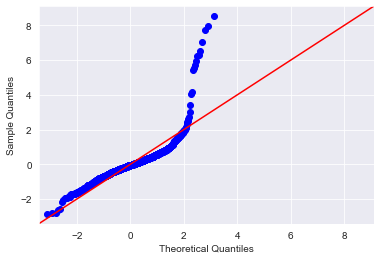

In [50]:
model_qqplot = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [17]:
q=0.9

# Set the index to q range
drop_index_train=y_train[y_train > y_train.quantile(q)].index
drop_index_test=y_test[y_test > y_test.quantile(q)].index

# Apply to Train
X_train = X_train.drop(index = drop_index_train)
y_train = y_train[y_train <= y_train.quantile(q)]

# Apply to Test
X_test = X_test.drop(index = drop_index_test)
y_test = y_test[y_test <= y_test.quantile(q)]

# Stats OLS Model
X_const_train = sm.add_constant(X_train)
model_qq = sm.OLS(y_train, X_const_train).fit()
model_qq.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     273.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:22:11   Log-Likelihood:                -609.18
No. Observations:                 829   AIC:                             1328.
Df Residuals:                     774   BIC:                             1588.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.1076      0.022   3438.471      0.000      77.064      77.152
Premature_death_raw_value                                      -0.6087      0.080     -7.598      0.000      -0.766      -0.451
Poor_or_fair_health_raw_value                                   0.1184      0.085      1.386      0.166      -0.049       0.286
Poor_physical_health_days_raw_value                            -0.3107      0.216     -1.439      0.150      -0.734       0.113
Poor_mental_health_days_raw_value                               0.0284      0.134      0.213      0.831      -0.234       0.291
Low_birthweight_raw_value                                      -0.0214      0.032     -0.668      0.504      -0.084       0.041
Adult_smoking_raw_value                                         0.1062      0.053      2.011      0.045       0.003       0.210
Adult_obesity_raw_value                                        -0.0265      0.031     -0.867      0.386      -0.087       0.034
Food_environment_index_raw_value                               -0.5952      0.322     -1.850      0.065      -1.227       0.036
Physical_inactivity_raw_value                                  -0.0662      0.036     -1.841      0.066      -0.137       0.004
Access_to_exercise_opportunities_raw_value                     -0.0445      0.026     -1.717      0.086      -0.095       0.006
Excessive_drinking_raw_value                                    0.0533      0.040      1.348      0.178      -0.024       0.131
Alcohol_impaired_driving_deaths_raw_value                       0.0201      0.021      0.966      0.334      -0.021       0.061
Sexually_transmitted_infections_raw_value                      -0.0008      0.025     -0.033      0.973      -0.050       0.049
Teen_births_raw_value                                          -0.0578      0.039     -1.491      0.136      -0.134       0.018
Uninsured_raw_value                                             1.3615      0.459      2.965      0.003       0.460       2.263
Primary_care_physicians_raw_value                              -0.0493      0.032     -1.531      0.126      -0.112       0.014
Dentists_raw_value                                              0.0035      0.028      0.125      0.901      -0.052       0.059
Mental_health_providers_raw_value                               0.0163      0.021      0.785      0.433      -0.025       0.057
Preventable_hospital_stays_raw_value                           -0.0612      0.024     -2.592      0.010      -0.108      -0.015
Mammography_screening_raw_value                                 0.0046      0.028      0.163      0.871      -0.051       0.060
Flu_vaccina

<b>Old</b>

Skew:	3.076	
Kurtosis:	23.230

<b>New</b>

Skew:	1.238	
Kurtosis:	11.732	

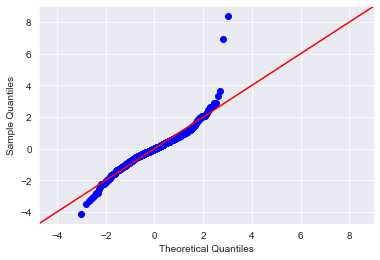

In [18]:
model_qqplot = sm.graphics.qqplot(model_qq.resid, dist=stats.norm, line='45', fit=True)

## Drop Columns on Non-Statistical Evaluation  
<b>Ease of collection</b>
- Has to be a value which is identifiable to the person? i.e Man

<b>Quantifiability</b>
- asd


<b>Cost of Collection</b>
- asdf

In [22]:
# X_cols = list(X.columns)
# for x in X_cols:
#     print(x)

In [23]:
# Drop max
drop = ['Premature_death_raw_value', 
        'Premature_age_adjusted_mortality_raw_value',
        'Poor_or_fair_health_raw_value', 
        'Poor_physical_health_days_raw_value', 
        'Poor_mental_health_days_raw_value', 
        'Adult_smoking_raw_value', 
        'Physical_inactivity_raw_value', 
        'Excessive_drinking_raw_value',
        'Preventable_hospital_stays_raw_value', 
        'Mammography_screening_raw_value', 
        'Driving_alone_to_work_raw_value',
        'Long_commute___driving_alone_raw_value', 
        'Frequent_physical_distress_raw_value', 
        'Frequent_mental_distress_raw_value',
        'Insufficient_sleep_raw_value',
        'Other_primary_care_providers_raw_value',
        'Drinking_water_violations_raw_value']
len(drop)

17

In [24]:
# # Drop Hard to measure
# drop = ['Premature_age_adjusted_mortality_raw_value', 
#         'Premature_death_raw_value', 
#         'Poor_or_fair_health_raw_value', 
#         'Poor_physical_health_days_raw_value', 
#         'Poor_mental_health_days_raw_value']
# len(drop)

In [28]:
cols = list(X_train.columns)
new_cols = [x for x in cols if x not in drop]

In [29]:
X_1 = X_train[new_cols]
len(X_train.columns) , len(X_1.columns)

(54, 37)

In [30]:
# Run if wish to check all variables
# X_1 = X.copy()

# Model 2:

In [31]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_1, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.6819434449606735


In [32]:
X_const = sm.add_constant(X_1)

model1 = sm.OLS(y_train, X_const).fit()
model1.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     61.53
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.42e-205
Time:                        17:25:30   Log-Likelihood:                -1291.4
No. Observations:                 829   AIC:                             2659.
Df Residuals:                     791   BIC:                             2838.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          76.8677      0.048   1606.098      0.000      76.774      76.962
Low_birthweight_raw_value                                       0.0237      0.065      0.365      0.715      -0.104       0.151
Adult_obesity_raw_value                                        -0.0805      0.063     -1.272      0.204      -0.205       0.044
Food_environment_index_raw_value                               -0.2983      0.719     -0.415      0.678      -1.709       1.113
Access_to_exercise_opportunities_raw_value                      0.0004      0.056      0.007      0.994      -0.109       0.110
Alcohol_impaired_driving_deaths_raw_value                       0.0855      0.046      1.869      0.062      -0.004       0.175
Sexually_transmitted_infections_raw_value                      -0.1543      0.055     -2.825      0.005      -0.261      -0.047
Teen_births_raw_value                                          -0.6902      0.078     -8.849      0.000      -0.843      -0.537
Uninsured_raw_value                                             2.6627      0.973      2.736      0.006       0.753       4.573
Primary_care_physicians_raw_value                              -0.0196      0.057     -0.342      0.732      -0.132       0.093
Dentists_raw_value                                             -0.0011      0.062     -0.017      0.986      -0.122       0.120
Mental_health_providers_raw_value                              -0.0610      0.045     -1.345      0.179      -0.150       0.028
Flu_vaccinations_raw_value                                      0.0352      0.055      0.642      0.521      -0.072       0.143
High_school_graduation_raw_value                               -0.2067      0.049     -4.260      0.000      -0.302      -0.111
Some_college_raw_value                                         -0.0369      0.074     -0.495      0.621      -0.183       0.109
Unemployment_raw_value                                          0.0665      0.067      0.997      0.319      -0.064       0.198
Children_in_poverty_raw_value                                  -0.0641      0.113     -0.566      0.572      -0.286       0.158
Income_inequality_raw_value                                    -0.1462      0.060     -2.446      0.015      -0.263      -0.029
Children_in_single_parent_households_raw_value                 -0.0335      0.072     -0.462      0.644      -0.176       0.109
Social_associations_raw_value                                  -0.0738      0.058     -1.278      0.202      -0.187       0.040
Violent_crime_raw_value                                         0.0570      0.050      1.129      0.259      -0.042       0.156
Injury_deat

In [33]:
# dir(model)

In [34]:
# model.params

## Eliminate Features using the P-value score

In [35]:
def func_rfe(X_1, model):
    X_cols = list(X_1.columns)
    X_cols = ['const'] + X_cols
    rfe = list(zip(X_cols, model.pvalues))
    rfe = pd.DataFrame(rfe, columns=['Parameters', 'P_values'])
    rfe.sort_values(by='P_values', ascending=True, inplace=True)
    rfe_reduced = rfe.loc[rfe['P_values'] < 0.05]
    return rfe_reduced

In [36]:
rfe_reduced = func_rfe(X_1, model1)
rfe_reduced

,Parameters,P_values
0,const,0.000000e+00
21,Injury_deaths_raw_value,1.042455e-35
7,Teen_births_raw_value,5.686708e-18
24,Diabetes_prevalence_raw_value,3.570683e-07
13,High_school_graduation_raw_value,2.285770e-05
22,Air_pollution___particulate_matter_raw_value,3.750902e-04
36,Population_raw_value,1.220931e-03
29,Uninsured_adults_raw_value,4.626648e-03
6,Sexually_transmitted_infections_raw_value,4.847540e-03
8,Uninsured_raw_value,6.351071e-03


In [37]:
rfe_reduced = rfe_reduced.loc[rfe_reduced['Parameters'] != 'const']
X_cols = list(rfe_reduced.Parameters)
X_2 = X_1[X_cols]
# X_2.sort_index()

In [38]:
X_1.shape, X_2.shape

((829, 37), (829, 10))

# Model 3:

In [30]:
X_const = sm.add_constant(X_2)

model2 = sm.OLS(y, X_const).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.10e-283
Time:                        15:59:47   Log-Likelihood:                -1721.8
No. Observations:                1024   AIC:                             3474.
Df Residuals:                    1009   BIC:                             3548.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.1440      0.042   1858.798      0.000      77.063      77.225
Injury_deaths_raw_value                         -0.8379      0.054    -15.534      0.000      -0.944      -0.732
Teen_births_raw_value                           -0.8156      0.063    -12.967      0.000      -0.939      -0.692
Air_pollution___particulate_matter_raw_value    -0.4138      0.056     -7.383      0.000      -0.524      -0.304
Diabetes_prevalence_raw_value                   -0.5442      0.065     -8.412      0.000      -0.671      -0.417
High_school_graduation_raw_value                -0.1544      0.046     -3.326      0.001      -0.246      -0.063
Population_raw_value                             0.1998      0.050      3.972      0.000       0.101       0.299
Motor_vehicle_crash_deaths_raw_value            -0.1830      0.056     -3.239      0.001      -0.294      -0.072
Sexually_transmitted_infections_raw_value       -0.2904      0.046     -6.268      0.000      -0.381      -0.199
Adult_obesity_raw_value                         -0.1466      0.060     -2.443      0.015      -0.264      -0.029
Alcohol_impaired_driving_deaths_raw_value        0.1039      0.044      2.339      0.020       0.017       0.191
Uninsured_adults_raw_value                      -2.6010      0.396     -6.563      0.000      -3.379      -1.823
County_Ranked                                    0.1380      0.045      3.078      0.002       0.050       0.226
Mental_health_providers_raw_value               -0.1718      0.043     -4.007      0.000      -0.256      -0.088
Uninsured_raw_value                              2.7002      0.386      6.997      0.000       1.943       3.457
==============================================================================
Omnibus:                       67.261   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.896
Skew:                          -0.284   Prob(JB):                     8.74e-45
Kurtosis:                       5.105   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
rfe_red2 = func_rfe(X_2, model2)
rfe_red2

,Parameters,P_values
0,const,0.000000e+00
1,Injury_deaths_raw_value,5.921421e-49
2,Teen_births_raw_value,1.126553e-35
4,Diabetes_prevalence_raw_value,1.362022e-16
3,Air_pollution___particulate_matter_raw_value,3.244668e-13
14,Uninsured_raw_value,4.752185e-12
11,Uninsured_adults_raw_value,8.437311e-11
8,Sexually_transmitted_infections_raw_value,5.413575e-10
13,Mental_health_providers_raw_value,6.611039e-05
6,Population_raw_value,7.626313e-05


In [32]:
rfe_red2 = rfe_red2.loc[rfe_red2['Parameters'] != 'const']
X_cols = list(rfe_red2.Parameters)
X_3 = X_2[X_cols]
# X_3.sort_index()

In [33]:
X_const = sm.add_constant(X_3)

model3 = sm.OLS(y, X_const).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.10e-283
Time:                        15:59:57   Log-Likelihood:                -1721.8
No. Observations:                1024   AIC:                             3474.
Df Residuals:                    1009   BIC:                             3548.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.1440      0.042   1858.798      0.000      77.063      77.225
Injury_deaths_raw_value                         -0.8379      0.054    -15.534      0.000      -0.944      -0.732
Teen_births_raw_value                           -0.8156      0.063    -12.967      0.000      -0.939      -0.692
Diabetes_prevalence_raw_value                   -0.5442      0.065     -8.412      0.000      -0.671      -0.417
Air_pollution___particulate_matter_raw_value    -0.4138      0.056     -7.383      0.000      -0.524      -0.304
Uninsured_raw_value                              2.7002      0.386      6.997      0.000       1.943       3.457
Uninsured_adults_raw_value                      -2.6010      0.396     -6.563      0.000      -3.379      -1.823
Sexually_transmitted_infections_raw_value       -0.2904      0.046     -6.268      0.000      -0.381      -0.199
Mental_health_providers_raw_value               -0.1718      0.043     -4.007      0.000      -0.256      -0.088
Population_raw_value                             0.1998      0.050      3.972      0.000       0.101       0.299
High_school_graduation_raw_value                -0.1544      0.046     -3.326      0.001      -0.246      -0.063
Motor_vehicle_crash_deaths_raw_value            -0.1830      0.056     -3.239      0.001      -0.294      -0.072
County_Ranked                                    0.1380      0.045      3.078      0.002       0.050       0.226
Adult_obesity_raw_value                         -0.1466      0.060     -2.443      0.015      -0.264      -0.029
Alcohol_impaired_driving_deaths_raw_value        0.1039      0.044      2.339      0.020       0.017       0.191
==============================================================================
Omnibus:                       67.261   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.896
Skew:                          -0.284   Prob(JB):                     8.74e-45
Kurtosis:                       5.105   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interactions 

In [34]:
def feature_combinations_r_sqrd_with_Inter_df(X, y, num_feat_comb=2):
    # Requires cals: baseline & crossvalidation
    
    # Create Regression & Combinations
    from itertools import combinations
    combinations = list(combinations(list(X.columns), num_feat_comb))
    
    # Create cross-validation & output a bassline MSE score as a DataFrame
    comb_scores = []
    inter_cols = []
    inter_score = []
    data = X.copy()
    
    for comb in combinations:
        data['interaction'] = data[comb[0]] * data[comb[1]]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: 
            comb_scores.append(round(score,3))
            inter_cols.append((str(comb[0]) + '_' + str(comb[1])))
            inter_score.append(data[comb[0]] * data[comb[1]])
    
    df_base = pd.DataFrame(data=[inter_cols, comb_scores])
    df_base = df_base.T  
    df_base.rename(columns={0: "Interaction", 1: "CV_score"}, inplace=True)
    df_base.sort_values(by='CV_score', inplace = True, ascending=False )
    df_base.reset_index(drop=True, inplace = True)
    
    df_interactions_scores = pd.DataFrame(data=inter_score , index=inter_cols)
    df_interactions_scores = df_interactions_scores.T
    

    return df_base , df_interactions_scores

In [35]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_3, y, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7190319812371024


In [36]:
df_base, df_score = feature_combinations_r_sqrd_with_Inter_df(X_3,y)

In [37]:
df_base.head(10)

,Interaction,CV_score
0,Teen_births_raw_value_Uninsured_adults_raw_value,0.728
1,Teen_births_raw_value_Uninsured_raw_value,0.728
2,Injury_deaths_raw_value_Adult_obesity_raw_value,0.726
3,Teen_births_raw_value_Diabetes_prevalence_raw_...,0.724
4,Injury_deaths_raw_value_Teen_births_raw_value,0.724
5,Injury_deaths_raw_value_County_Ranked,0.724
6,Injury_deaths_raw_value_Air_pollution___partic...,0.723
7,Teen_births_raw_value_Adult_obesity_raw_value,0.723
8,Injury_deaths_raw_value_Diabetes_prevalence_ra...,0.722
9,Population_raw_value_Adult_obesity_raw_value,0.721


In [38]:
def add_interaction_feature(data, df_inter, df_score, num_inter):
    i=0
    
    while i < num_inter:
        col = df_inter['Interaction'][i]
  
        data[col] = df_score[col]
        i+=1
    
    return data

In [39]:
data_combined = add_interaction_feature(X_3, df_base, df_score, 7)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [41]:
# data_combined.head()

# Polynomial Parameters

In [42]:
# from sklearn.preprocessing import PolynomialFeatures

# regression = LinearRegression()
# crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# polynomials = []
# for col in X.columns:
#     for degree in [2, 3, 4]:
#         data = X.copy()
#         poly = PolynomialFeatures(degree, include_bias=False)
#         X_transformed = poly.fit_transform(X[[col]])
#         data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
#         score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#         if score > baseline: polynomials.append((col, degree, round(score, 3)))
# print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

In [43]:
# polynom = pd.DataFrame(polynomials)
# polynom.groupby([0], sort=False)[2].max()

# Full model R-squared  

In [44]:
full_model = np.mean(cross_val_score(regression, data_combined, y, scoring='r2', cv=crossvalidation))
print("Full model R^2:", full_model)

Full model R^2: 0.7385666665119374


In [45]:
X_const = sm.add_constant(data_combined)

model = sm.OLS(y, X_const).fit()
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          4.61e-301
Time:                        16:00:37   Log-Likelihood:                -1661.4
No. Observations:                1024   AIC:                             3367.
Df Residuals:                    1002   BIC:                             3475.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                   77.0629      0.047   1640.078      0.000      76.971      77.155
Injury_deaths_raw_value                                                 -0.8472      0.057    -14.746      0.000      -0.960      -0.734
Teen_births_raw_value                                                   -0.8471      0.061    -13.850      0.000      -0.967      -0.727
Diabetes_prevalence_raw_value                                           -0.3939      0.064     -6.119      0.000      -0.520      -0.268
Air_pollution___particulate_matter_raw_value                            -0.3646      0.055     -6.660      0.000      -0.472      -0.257
Uninsured_raw_value                                                      3.2737      0.419      7.813      0.000       2.452       4.096
Uninsured_adults_raw_value                                              -3.4098      0.433     -7.866      0.000      -4.260      -2.559
Sexually_transmitted_infections_raw_value                               -0.2486      0.047     -5.324      0.000      -0.340      -0.157
Mental_health_providers_raw_value                                       -0.0932      0.042     -2.240      0.025      -0.175      -0.012
Population_raw_value                                                     0.2103      0.049      4.286      0.000       0.114       0.307
High_school_graduation_raw_value                                        -0.1170      0.044     -2.647      0.008      -0.204      -0.030
Motor_vehicle_crash_deaths_raw_value                                    -0.0831      0.055     -1.510      0.131      -0.191       0.025
County_Ranked                                                            0.1328      0.043      3.091      0.002       0.048       0.217
Adult_obesity_raw_value                                                 -0.1074      0.057     -1.868      0.062      -0.220       0.005
Alcohol_impaired_driving_deaths_raw_value                                0.1085      0.042      2.565      0.010       0.026       0.192
Teen_births_raw_value_Uninsured_adults_raw_value                         0.5759      0.247      2.332      0.020       0.091       1.061
Teen_births_raw_value_Uninsured_raw_value                               -0.3029      0.254     -1.192      0.233      -0.802       0.196
Injury_deaths_raw_value_Adult_obesity_raw_value                         -0.0676      0.050     -1.363      0.173      -0.165       0.030
Teen_births_raw_value_Diabetes_prevalence_raw_value                     -0.0627      0.049     -1.287      0.198      -0.158       0.033
Injury_deaths_raw_value_Teen_births_raw_value                        

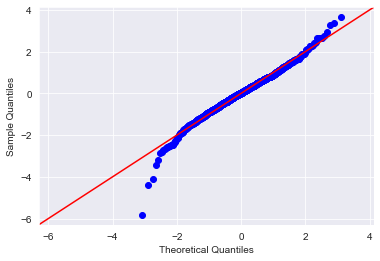

In [46]:
model_qqplot = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Lasso

In [56]:
X_final = data_combined

## AIC & BIC Alpha Selection using Lasso

In [49]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


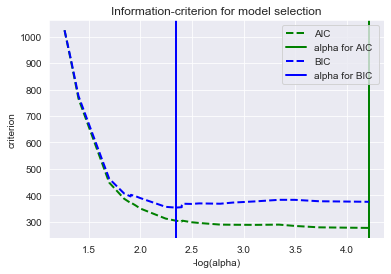

In [51]:
# Finding the optimum alpha value for the AIC & BIC critiria

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

## Checking Against the test data

In [66]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [80]:
def model_validation(X_train, y_train, X_test, y_test):
    # cuting shapes
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    # Code for baseline model
    linreg_all = LinearRegression()
    linreg_all.fit(X_train, y_train)

    # Print R2 and MSE
    print("Model")
    print("----------------------------------------")
    print('Training r^2:', linreg_all.score(X_train, y_train))
    print('Test r^2:', linreg_all.score(X_test, y_test))
    print("----------------------------------------")
    print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train)))
    print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test)))

### Baseline model validation

In [81]:
model_validation(X_train, y_train , X_test, y_test)

(1138, 54) (1138,) (1000, 54) (1000,)
Model
----------------------------------------
Training r^2: 0.921646427639468
Test r^2: 0.8818968029390362
----------------------------------------
Training MSE: 0.7231488985132823
Test MSE: 0.9668867911017314


### RFE Model Validation

In [74]:
X_cols = list(X_2.columns)
X_3_test = X_test[X_cols]

In [79]:
X_2.shape, y_train.shape , X_3_test.shape, y_test.shape

((1024, 14), (1138,), (1000, 14), (1000,))

In [76]:
model_validation(X_2, y_train , X_3_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1024, 1138]

## Lasso paths

In [52]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path

In [59]:
def comp_lasso_paths(X,y, eps=5e-3):
    
    eps = eps  # path length (Smaller = Longer)

    # Compute paths
    print("Computing regularization path using the lasso...")
    alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
    
    print("Computing regularization path using the positive lasso...")
    alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
        X, y, eps, positive=True, fit_intercept=False)
    print("Computing regularization path using the elastic net...")
    alphas_enet, coefs_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

    print("Computing regularization path using the positive elastic net...")
    alphas_positive_enet, coefs_positive_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)
    
    # Display results

    plt.figure(1)
    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_lasso = -np.log10(alphas_lasso)
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and Elastic-Net Paths')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
    plt.axis('tight')


    plt.figure(2)
    neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
    for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and positive Lasso')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
    plt.axis('tight')


    plt.figure(3)
    neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
    for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
        l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Elastic-Net and positive Elastic-Net')
    plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
               loc='lower left')
    plt.axis('tight')
    plt.show()
    
    return None

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


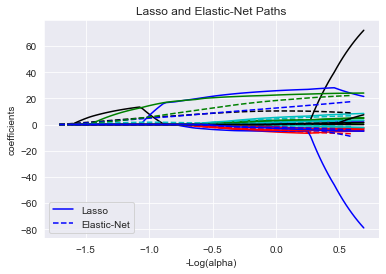

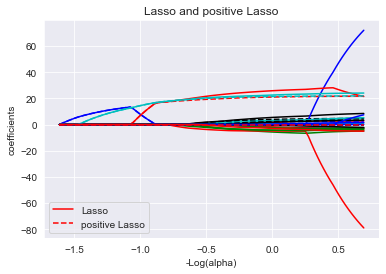

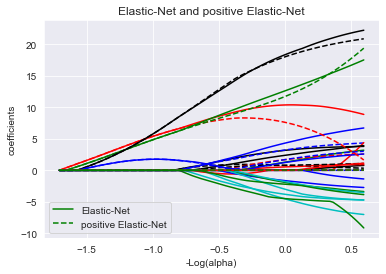

In [60]:
comp_lasso_paths(X_final, y, eps=5e-3)

In [ ]:
x

# ZZ -  Feature ranking to recursive eliminate features

In [ ]:
# df_feat_rank = pd.concat([y,X_1], axis=1)
# df_feat_rank.head()

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=20) # 20 most important features
selector = selector.fit(X_1, y)
estimators = selector.estimator_

In [ ]:
# print(selector.support_ )
# print(selector.ranking_)
# print(estimators.coef_)
# print(estimators.intercept_)
print(selector.classes_)

In [ ]:
# dir(selector)

In [ ]:
X_cols = list(X_1.columns)
X_best = []
i=0
for x in selector.support_:
    if x == True:
        X_best.append((X_cols[i], selector.ranking_[i]))
    i+=1

In [ ]:
# X_best

In [ ]:
sell = list(zip(X_cols, estimators.coef_, selector.ranking_, selector.support_))
df_selection = pd.DataFrame(sell, columns=['X_cols', 'coef','ranking', 'support'])
df_selection.sort_values(by=['ranking'], inplace=True)
df_selection.head(30)

In [ ]:
corr = X_1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           center=True)